<a href="https://colab.research.google.com/github/aditya140/PtrNet_TSP_Solver/blob/master/TSP_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/aditya140/PtrNet_TSP_Solver.git
!pip install -r /content/PtrNet_TSP_Solver/requirements.txt

Cloning into 'PtrNet_TSP_Solver'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 200 (delta 109), reused 142 (delta 56), pack-reused 0
Receiving objects: 100% (200/200), 16.80 MiB | 35.25 MiB/s, done.
Resolving deltas: 100% (109/109), done.
     |████████████████████████████████| 28.9MB 110kB/s 
     |████████████████████████████████| 1.3MB 55.4MB/s 
  Created wheel for hyperdash: filename=hyperdash-0.15.3-cp36-none-any.whl size=28553 sha256=75e88b5e4599d41e7f2a3fd9e5a592cf4b6067c5fd491bd8a2901a122bb47b0c
  Stored in directory: /root/.cache/pip/wheels/62/5f/af/bbcaeb6570e4904c14fb4c1b70fee559a3788182ce4d104ce7
Successfully built hyperdash
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


In [0]:
cd PtrNet_TSP_Solver/

/content/PtrNet_TSP_Solver


In [0]:
from runModel import *

In [0]:
device = torch.device('cuda')
model=load_model("model_10")
model.to(device)

PointerNet(
  (encoder): Encoder(
    (embedding): Linear(in_features=2, out_features=128, bias=True)
    (rnn): LSTM(128, 256, num_layers=2, dropout=0.1)
  )
  (decoder): Decoder(
    (hid_out): Linear(in_features=512, out_features=256, bias=True)
    (rnn): LSTMCell(128, 256)
    (att): Attention(
      (inp_layer): Linear(in_features=256, out_features=256, bias=True)
      (context_layer): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
    )
  )
)

In [0]:
from tsp_solver import utils
import torch
solver=utils.BaselineSolver()
solver.add_model(model,device)

In [0]:
import numpy as np
except_alg=["Genetic"]
random_points=np.random.random((10, 2))
results=solver.solve_all(random_points,returnTours=True,except_alg=except_alg)

In [0]:
print(results)

{'Nearest Neighbour': (2.8541694421143653, array([0, 4, 9, 6, 5, 1, 7, 8, 2, 3])), 'Farthest Neighbour': (5.3470349568970565, array([0, 3, 4, 8, 9, 2, 6, 7, 5, 1])), 'Optimal': (2.532098976636736, array([0, 2, 8, 7, 1, 5, 3, 6, 9, 4])), 'Google OR': (2.532098976636736, array([0, 4, 9, 6, 3, 5, 1, 7, 8, 2])), 'random': (3.6207867940871443, array([0, 4, 1, 3, 7, 5, 8, 2, 6, 9])), 'Nearest insertion': (3.1434185349375765, [2, 7, 8, 4, 0, 9, 3, 6, 5, 1]), 'Model': (2.555626595084729, [0, 4, 9, 6, 5, 3, 1, 7, 8, 2])}


## Optimal Solution

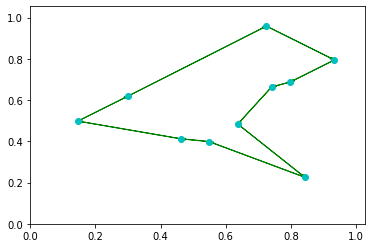

In [0]:
utils.plotTSP([results["Optimal"][1]],random_points.tolist())

## PointerNet solution

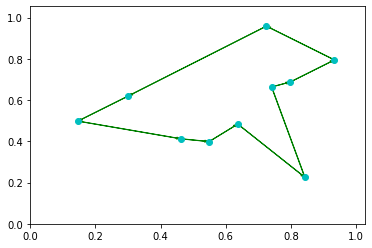

In [0]:
utils.plotTSP([results["Model"][1]],random_points.tolist())

## Random Solution

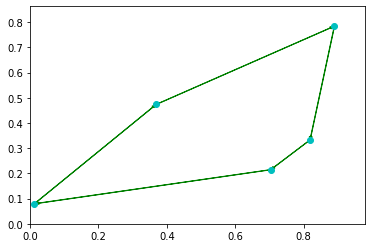

In [0]:
utils.plotTSP([results["random"][1]],random_points.tolist())

## Nearest Neighbour Solution

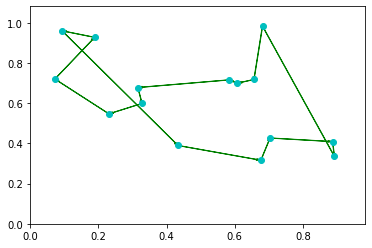

In [0]:
utils.plotTSP([results["Nearest Neighbour"][1]],random_points.tolist())

## GOOGLE OR SOLUTION

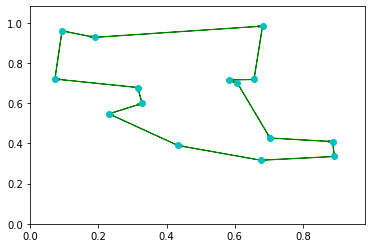

In [0]:
utils.plotTSP([results["Google OR"][1]],random_points.tolist())

## Genetic Algorithm Solution

In [0]:
utils.plotTSP([results["Genetic"][1]],random_points.tolist())

KeyError: ignored